**Data Modeling - Logistic Regression**

In [ ]:
import rpy2
import pandas as pd 
import numpy as np
import os 
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#!pip install sklearn
df = pd.read_csv('ExportedSubsetData.csv')
#Print data frame
df
#Dataset Info Summary
df.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


**1. Data Cleaning**

In [ ]:
# 1.1 - Removing Variables not needed for Calssification
newData = df.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   oldbalanceOrg   50000 non-null  float64
 4   newbalanceOrig  50000 non-null  float64
 5   oldbalanceDest  50000 non-null  float64
 6   newbalanceDest  50000 non-null  float64
 7   isFraud         50000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ MB


In [ ]:
# 1.2 - Retaining only CASH-OUT and TRANSFER transactions
newData = newData.loc[newData['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has', len(newData), ' transations.')

The new data now has 21879  transations.


In [ ]:
# 1.3 - Converting categorical varaible to numeric representation
# Encoding categorical "type" variable to convert transation type to binary variables
newData = pd.get_dummies(newData, columns=['type'], prefix=['type'])
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21879 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            21879 non-null  int64  
 1   amount          21879 non-null  float64
 2   oldbalanceOrg   21879 non-null  float64
 3   newbalanceOrig  21879 non-null  float64
 4   oldbalanceDest  21879 non-null  float64
 5   newbalanceDest  21879 non-null  float64
 6   isFraud         21879 non-null  int64  
 7   type_CASH_OUT   21879 non-null  uint8  
 8   type_TRANSFER   21879 non-null  uint8  
dtypes: float64(5), int64(2), uint8(2)
memory usage: 1.4 MB


In [ ]:
# Print first 5 rows
newData.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
0,182,129804.96,0.00,0.0,4225880.68,4355685.64,0,1,0
4,252,61214.57,0.00,0.0,364102.11,425316.68,0,1,0
5,18,125379.52,0.00,0.0,883177.46,1120071.12,0,1,0
6,331,30449.41,0.00,0.0,456924.04,487373.45,0,1,0
7,277,157649.53,7660.25,0.0,491363.14,649012.67,0,1,0


In [ ]:
# To check min value of a feature. For Example:
newData['step'].min()

1

In [ ]:
# To check max value of a feature. For Example:
newData['step'].max()

742

**2. Data Normalization**

In [ ]:
# 2.1 (a) - Standardizing the Data or Scale Data using MinMaxScaler to convert the value between the min and max
# https://www.youtube.com/watch?v=sFVxFCYiIQI (15:00)
from sklearn.preprocessing import MinMaxScaler
scale_vars = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud' ]
scaler = MinMaxScaler()
newData[scale_vars] = scaler.fit_transform(newData[scale_vars])
newData.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
0,0.244265,0.003076,0.000000,0.0,0.026917,0.027718,0.0,1,0
4,0.338731,0.001450,0.000000,0.0,0.002319,0.002707,0.0,1,0
5,0.022942,0.002971,0.000000,0.0,0.005626,0.007128,0.0,1,0
6,0.445344,0.000721,0.000000,0.0,0.002910,0.003102,0.0,1,0
7,0.372470,0.003736,0.000175,0.0,0.003130,0.004130,0.0,1,0


In [ ]:
# 2.1 (b) - Data Normalization using the Min-Max Method 
normalized_df = newData.copy()

for column in normalized_df.columns:
  normalized_df[column] = (normalized_df[column] - normalized_df[column].min())/(normalized_df[column].max() - normalized_df[column].min())
normalized_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
0,0.244265,0.003076,0.000000,0.0,0.026917,0.027718,0.0,1.0,0.0
4,0.338731,0.001450,0.000000,0.0,0.002319,0.002707,0.0,1.0,0.0
5,0.022942,0.002971,0.000000,0.0,0.005626,0.007128,0.0,1.0,0.0
6,0.445344,0.000721,0.000000,0.0,0.002910,0.003102,0.0,1.0,0.0
7,0.372470,0.003736,0.000175,0.0,0.003130,0.004130,0.0,1.0,0.0


In [ ]:
# 2.1 (c) Standardizing the Data: converting all columns to have the same range
# Normalization of dataset
std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(newData.loc[:,~newData.columns.isin(['isFraud'])]))
data_scaled.columns = newData.columns[:-1]
data_scaled['isFraud'] = newData['isFraud']

In [ ]:
# To validate min value of a feature has been converted. For Example:
newData['step'].min()

0.0

In [ ]:
# To validate max value of a feature has been converted. For Example:
newData['step'].max()

0.9999999999999999

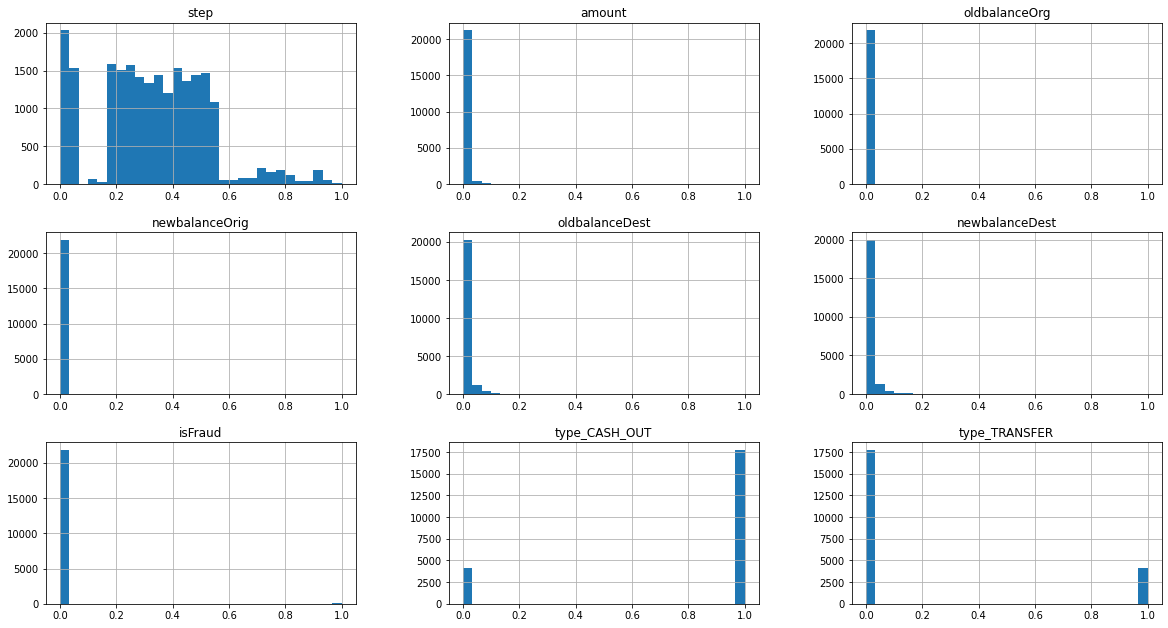

In [ ]:
# 2.2 - Visualize distributions
newData.hist(bins=30, figsize=(20,30), layout=(8,3));

In [ ]:
# 2.3 - Transformation of Independent Variables with visually non-normal distributions 
normalized_df[['step', 
         'amount',
         'oldbalanceOrg',
         'newbalanceOrig',
         'oldbalanceDest',
         'newbalanceDest',
         'isFraud']] = normalized_df[['step', 
         'amount',
         'oldbalanceOrg',
         'newbalanceOrig',
         'oldbalanceDest',
         'newbalanceDest',
         'isFraud']].applymap(lambda x: np.log(1+x))

normalized_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
count,21879.000000,21879.000000,21879.000000,21879.000000,21879.000000,21879.000000,21879.000000,21879.000000,21879.000000
mean,0.271409,0.007560,0.001104,0.000364,0.010620,0.012774,0.002154,0.810046,0.189954
std,0.144908,0.019878,0.006662,0.005033,0.022766,0.025241,0.038583,0.392273,0.392273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188823,0.001944,0.000000,0.000000,0.000867,0.002119,0.000000,1.000000,0.000000
50%,0.275462,0.004021,0.000006,0.000000,0.003567,0.005284,0.000000,1.000000,0.000000
75%,0.370213,0.007182,0.000701,0.000000,0.011085,0.013629,0.000000,1.000000,0.000000
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000,1.000000


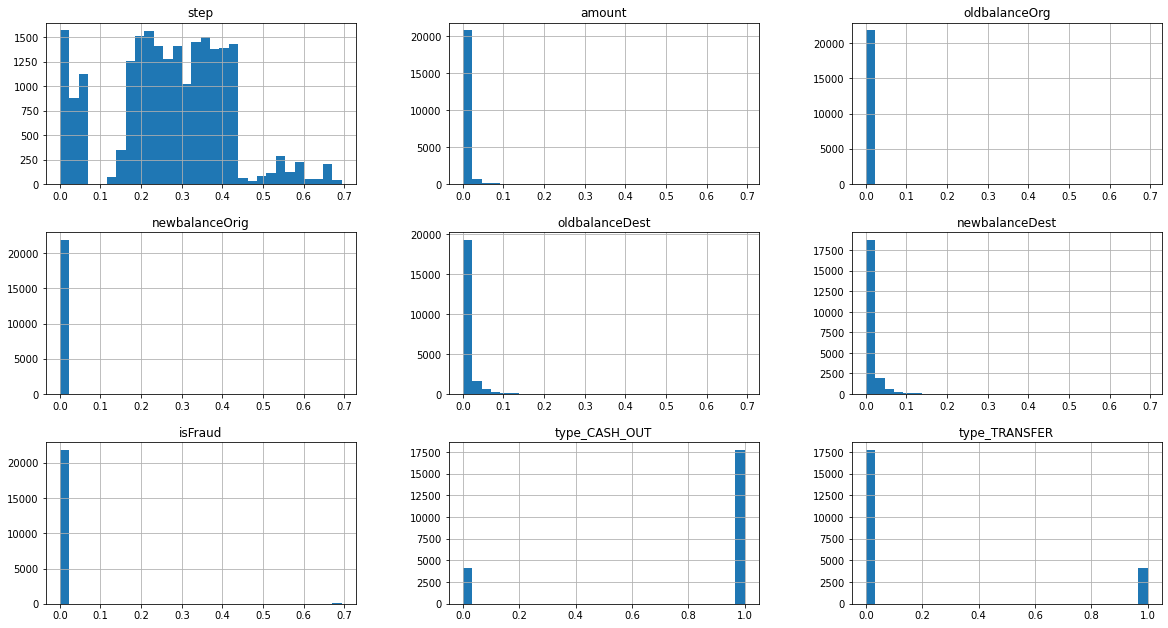

In [ ]:
# Visualize distributions
normalized_df.hist(bins=30, figsize=(20,30), layout=(8,3));

**3.	Create Train and Test Datasets**

In [ ]:
# 3.1 - Split the scaled cleaned dataset into 70%  training and 30% testing datasets
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python
# Model building in Scikit-learn
# Split dataset into feature (independant variable) and target variable (isFraud)
feature_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_OUT','type_TRANSFER']
X = newData[feature_cols] # Features
y = newData.isFraud # Target variable

# Split X and y into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# 3.2 - SMOT
# https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

sm = SMOTE(random_state=25, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

**4. Setup Logistic Regression Model**

In [ ]:
# 4.1 - Import and setup Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using the default parameters)
scr = 'recall'
accuracy_dict = {}
model_lr = LogisticRegression()

# Fit the model with data
model_lr.fit(X_train,y_train)

y_pred=model_lr.predict(X_test)

In [ ]:
# 4.2 - Import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5863,  681],
       [   6,   14]])

Text(0.5, 257.44, 'Predicted label')

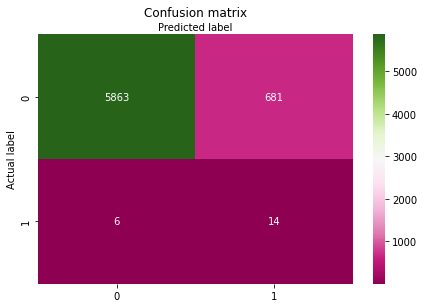

In [ ]:
# 4.3 - Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# 4.4 - Confusion Matrix Evaluation Metrics (NOTE: classification rate of 80%, considered as good accuracy)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Classification rate of 80%, considered as good accuracy.
#Precision: Precision is about being precise, i.e., how accurate your model is. In other words, when a model makes a prediction,how often it is correct. 
#In sample prediction case, when Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.
#Recall: If there are patients who have diabetes in the test set and the Logistic Regression model can identify it 58% of the time.

Accuracy: 0.8953382084095064
Precision: 0.02014388489208633
Recall: 0.7


**5. Model Evaluation & Validation (TBD)**

In [ ]:
# 5.1 - Calculate Evaluation Metrics 
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('R^2', metrics.r2_score(y_test, y_pred))
print('RMSE', metrics.mean_squared_error(y_test, y_pred))

MAE 0.1046617915904936
R^2 -33.45498166259168
RMSE 0.1046617915904936


/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


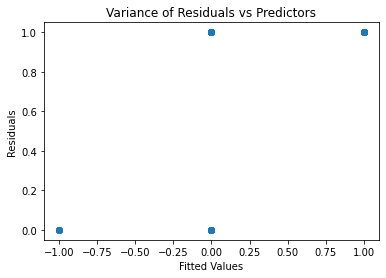

In [ ]:
# 5.2 - Plot residuals to determine variance 
residuals = y_pred - y_test 
sns.regplot(y=y_pred, x=residuals, lowess=True)
plt.title("Variance of Residuals vs Predictors")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

*****Extra Codes for Reference**

**Defining the Model for Logistic Regression**

In [ ]:
# Stratified 5-fold cross-validation: to ensure models do not overfit the training data
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(5)

In [ ]:
# 6. Check class imbalance in Train and Test Datasets
#Class Imbalance - Percentage Frequency
dFraud = pd.DataFrame(y_train_original, columns= ['isFraud'])
# Percentage calculation
(dFraud['isFraud'].value_counts()/dFraud['isFraud'].count())*100

2    56.271629
0    43.578191
1     0.150180
Name: isFraud, dtype: float64

In [ ]:
#Class Imbalance - Percentage Frequency
dFraud = pd.DataFrame(y_test_original, columns= ['isFraud'])
# Percentage calculation
(dFraud['isFraud'].value_counts()/dFraud['isFraud'].count())*100

2    56.170018
0    43.723339
1     0.106642
Name: isFraud, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
scr = 'recall'
accuracy_dict = {}
model_lr = LogisticRegression()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Version 1: Create Train and Test Datasets: 70% for training and 30% for testing
# Check https://www.youtube.com/watch?v=sFVxFCYiIQI (16:20) Splitting Raw Data - X = exclude isFraud, y = isFraud only
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
X = data_scaled.loc[:, data_scaled.columns != 'isFraud']
y = data_scaled.loc[:, data_scaled.columns == 'isFraud']

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X,y,test_size = 0.3, random_state = 0)

label_encoder = LabelEncoder()
y_train_original = label_encoder.fit_transform(y_train_original.values.ravel())
y_test_original = label_encoder.fit_transform(y_test_original.values.ravel())

In [ ]:
print('X shape:{}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape:(21879, 7)
y shape: (21879, 1)


In [ ]:
# Version 2: Check https://www.youtube.com/watch?v=sFVxFCYiIQI (16:20) Splitting Raw Data - X = exclude isFraud, y = isFraud only
from sklearn.model_selection import train_test_split
X = newData.drop('isFraud', axis=1).values
y = newData['isFraud'].values
print('X shape:{}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

X shape:(21879, 8)
y shape: (21879,)


In [ ]:
# Logistic Regression Model Training
sc_lr = cross_val_score(model_lr, x_train_original, y_train_original, scoring =scr)